In [1]:
%matplotlib inline

In [2]:
from IPython.display import Image

import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
from rasterio import plot as rio_plot
from rasterio import windows as rio_windows

We will use the Swiss [Generalized Municipal Boundaries (GMB)](https://www.bfs.admin.ch/bfs/de/home/dienstleistungen/geostat/geodaten-bundesstatistik/administrative-grenzen/generalisierte-gemeindegrenzen.assetdetail.5247306.html) and [Corine Land Cover (CLC)](https://land.copernicus.eu/pan-european/corine-land-cover) datasets in order to generate a time series of raster land cover maps for three urban agglomerations.

The GMB dataset consists of a shapefile with a set of municipal boundaries, where the `ANAME` indicates the agglomeration that each geometry belongs to:

In [3]:
gdf = gpd.read_file('../data/raw/gmb/g1a18.shp')
gdf.head()

,CODE_ISO,GMDNR,GMDNAME,AREA_HA,X_CNTR,Y_CNTR,ACODE,AKAT,ANAME,E_CNTR,N_CNTR,geometry
0,CH,1,Aeugst am Albis,791,679300,235700,261,4,Zürich,2679300,1235700,"POLYGON ((2678219 1235219, 2678439 1235360, 26..."
1,CH,10,Obfelden,754,675100,235300,261,4,Zürich,2675100,1235300,"POLYGON ((2673859 1233032, 2673590 1233469, 26..."
2,CH,100,Stadel,1289,677500,264700,261,4,Zürich,2677500,1264700,"POLYGON ((2677040 1263227, 2676832 1263562, 26..."
3,CH,101,Steinmaur,939,676600,261500,261,4,Zürich,2676600,1261500,"POLYGON ((2678166.692499999 1260573.762500003,..."
4,CH,102,Weiach,958,675200,267800,261,4,Zürich,2675200,1267800,"POLYGON ((2673733 1268649, 2674332.7575 126900..."


On the other hand, the CLC is a land cover raster at the European extent (here we plot the Swiss part as extracted from the boundaries of GMB)

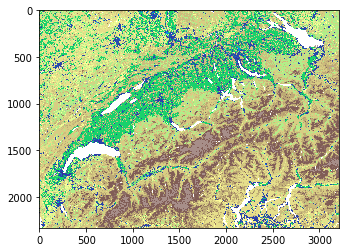

In [4]:
with rio.open('../data/raw/clc/g100_clc00_V18_5.tif', 'r') as src:
    bounds = gdf.to_crs(src.crs)['geometry'].total_bounds
    clc_arr = src.read(1, window=rio_windows.from_bounds(*bounds, transform=src.transform))

plt.imshow(clc_arr, cmap='terrain')                       

We will use the CLC datasets for the years 2000, 2006 and 2012 in order to generate a time series of binary urban/non-urban land cover maps for the three agglomerations.

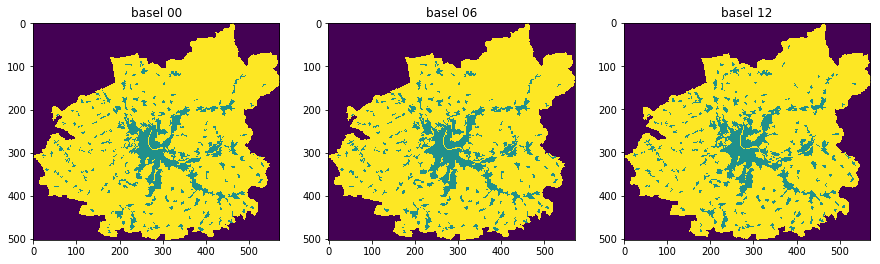

In [5]:
year_codes = ['00', '06', '12']

fig, axes = plt.subplots(1, len(year_codes), figsize=(5 * len(year_codes), 5))

for year_code, ax in zip(year_codes, axes):
    with rio.open(f'../data/processed/urban_extracts/basel-g100_clc{year_code}_V18_5.tif', 'r') as src:
        rio_plot.show(src.read(1), ax=ax)
        ax.set_title(f'basel {year_code}')

Then we will use the [PyLandstats](https://github.com/martibosch/pylandstats) library to compute two landscape metrics:
* the [proportion of landscape](http://www.umass.edu/landeco/research/fragstats/documents/Metrics/Area - Density - Edge Metrics/Metrics/C4 - PLAND.htm) occupied by urban land cover, and 
* the [area-weighted mean fractal dimension](http://www.umass.edu/landeco/research/fragstats/documents/Metrics/Shape Metrics/Metrics/P9 - FRAC.htm) of urban patches, which reflects the complexity of their shape;

Subsequently, we will assemble the computed metrics for each agglomeration in order to produce the following figure:

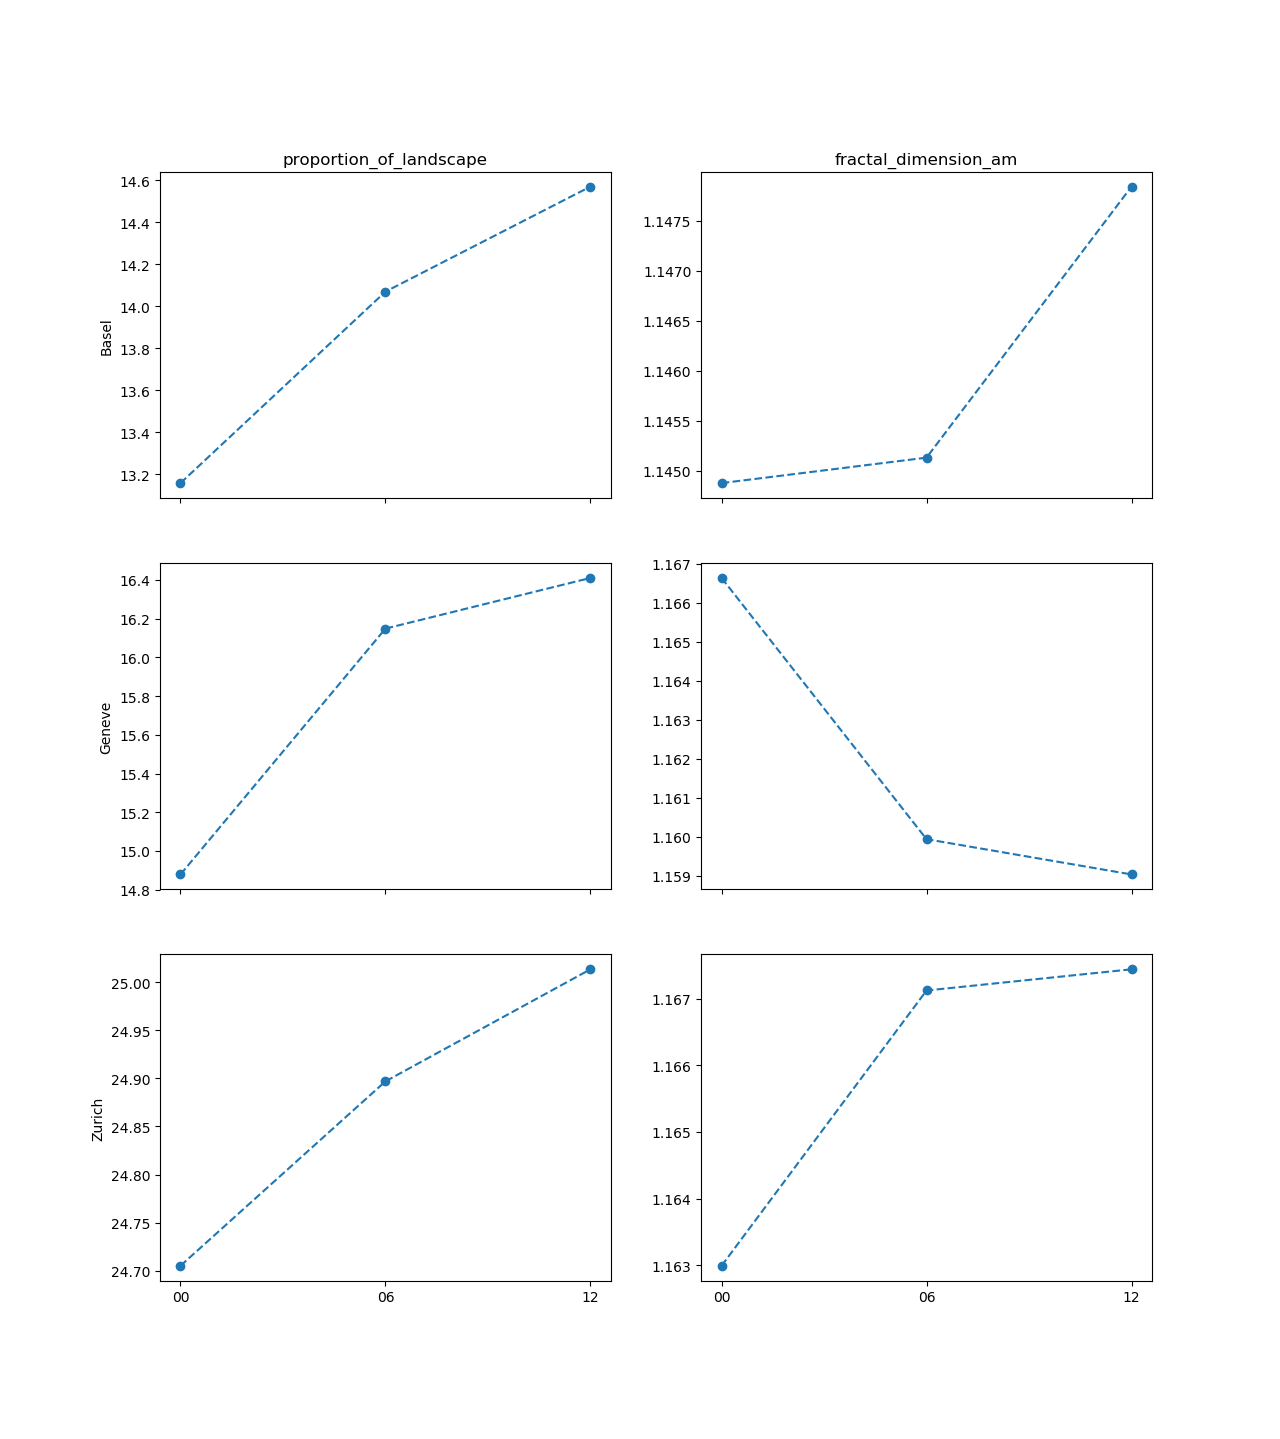

In [6]:
Image(filename='../reports/figures/swiss-urbanization.png')